Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy

Sebastian Raschka 
Last updated: 12/31/2015 

CPython 3.5.1
IPython 4.0.1

matplotlib 1.5.0
numpy 1.10.2
scipy 0.16.0


In [2]:
import sys
sys.path.insert(0, '../../../mlxtend/')

import mlxtend
mlxtend.__version__

'0.3.0'

In [3]:
%matplotlib inline

# Neural Network - Multilayer Perceptron

Implementation of a multilayer perceptron, a feedforward artificial neural network.

> from mlxtend.classifier import NeuralNetMLP

# Overview

*Although the code is fully working and can be used for common classification tasks, this implementation is not geared towards efficiency but clarity – the original code was written for demonstration purposes.*

## Basic Architecture

![](./img/neuralnet_mlp_1.png)  

The neurons $x_0$ and $a_0$ represent the bias units ($x_0=1$, $a_0=1$). 

The $i$th superscript denotes the $i$th layer, and the *j*th subscripts stands for the index of the respective unit. For example, $a_{1}^{(2)}$ refers to the first activation unit **after** the bias unit (i.e., 2nd activation unit) in the 2nd layer (here: the hidden layer)

  \begin{align}
    \mathbf{a^{(2)}} &= \begin{bmatrix}
           a_{0}^{(2)} \\
           a_{1}^{(2)} \\
           \vdots \\
           a_{m}^{(2)}
         \end{bmatrix}.
  \end{align}

Each layer $(l)$ in a multi-layer perceptron, a directed graph, is fully connected to the next layer $(l+1)$. We write the weight coefficient that connects the $k$th unit in the $l$th layer to the $j$th unit in layer $l+1$ as $w^{(l)}_{j, k}$.

For example, the weight coefficient that connects the units

$a_0^{(2)} \rightarrow a_1^{(3)}$

would be written as $w_{1,0}^{(2)}$.

## Activation

In the current implementation, the activations of the hidden and output layers are computed via the logistic (sigmoid) function $\phi(z) = \frac{1}{1 + e^{-z}}.$

![](./img/logistic_function.png)

(For more details on the logistic function, please see [`classifier.LogisticRegression`](./LogisticRegression.md); a general overview of different activation function can be found [here](../general_concepts/activation-functions.md).)

## Multi-class prediction

### References

- D. R. G. H. R. Williams and G. Hinton. [Learning representations by back-propagating errors](http://lia.disi.unibo.it/Courses/SistInt/articoli/nnet1.pdf). Nature, pages 323–533, 1986.
- C. M. Bishop. [Neural networks for pattern recognition](https://books.google.de/books?hl=en&lr=&id=T0S0BgAAQBAJ&oi=fnd&pg=PP1&dq=Neural+networks+for+pattern+recognition&ots=jL6TqGbBld&sig=fiLrMg-RJx22cgQ7zd2CiwUqNqI&redir_esc=y#v=onepage&q=Neural%20networks%20for%20pattern%20recognition&f=false). Oxford University Press, 1995.
- T. Hastie, J. Friedman, and R. Tibshirani. [The Elements of Statistical Learning](http://statweb.stanford.edu/%7Etibs/ElemStatLearn/), Volume 2. Springer, 2009.

### Related Topics

- [`data.mnist`](../data/mnist.md) and [`data.load_mnist`](../data/load_mnist.md)
- [`classifier.LogisticRegression`](./LogisticRegression.md)
- [Activation functions](../activation-functions.md)

# Examples

## Example 1 - Classifying Iris Flowers

Load 2 features from Iris (petal length and petal width) for visualization purposes:

In [4]:
from mlxtend.data import iris_data
X, y = iris_data()
X = X[:, [0, 2]]    

# standardize training data
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

Train neural network for 3 output flower classes ('Setosa', 'Versicolor', 'Virginica'), regular gradient decent (`minibatches=1`), 30 hidden units, and no regularization.

### Gradient Descent

Setting the `minibatches` to `1` will result in gradient descent training (see [Gradient Descent vs. Stochastic Gradient Descent](../general_concepts/gradient_optimization.md) for details).

In [5]:
from mlxtend.classifier import NeuralNetMLP

import numpy as np
nn1 = NeuralNetMLP(n_output=len(np.unique(y)), 
                   n_features=X_std.shape[1], 
                   n_hidden=50, 
                   l2=0.00, 
                   l1=0.0, 
                   epochs=300, 
                   eta=0.01, 
                   alpha=0.0,
                   decrease_const=0.0,
                   minibatches=1, 
                   shuffle_init=False,
                   shuffle_epoch=False,
                   random_state=1,
                   print_progress=3)

nn1 = nn1.fit(X_std, y)

Epoch: 300/300, Elapsed: 0:00:00, ETA: 0:00:00

In [6]:
y_pred = nn1.predict(X_std)
acc = np.sum(y == y_pred, axis=0) / X_std.shape[0]
print('Accuracy: %.2f%%' % (acc * 100))

Accuracy: 96.67%


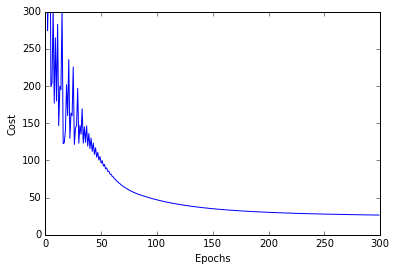

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(len(nn1.cost_)), nn1.cost_)
plt.ylim([0, 300])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

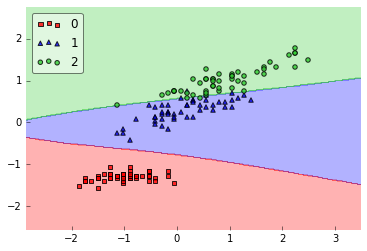

In [8]:
from mlxtend.evaluate import plot_decision_regions
fig = plot_decision_regions(X=X_std, y=y, clf=nn1, legend=2)

### Stochastic Gradient Descent

Setting `minibatches` to `n_samples` will result in stochastic gradient descent training (see [Gradient Descent vs. Stochastic Gradient Descent](../general_concepts/gradient_optimization.md) for details).

In [9]:
from mlxtend.classifier import NeuralNetMLP

import numpy as np
nn2 = NeuralNetMLP(n_output=len(np.unique(y)), 
                   n_features=X_std.shape[1], 
                   n_hidden=50, 
                   l2=0.00, 
                   l1=0.0, 
                   epochs=30, 
                   eta=0.01, 
                   alpha=0.2,
                   decrease_const=0.0,
                   minibatches=X_std.shape[0], 
                   shuffle_init=True,
                   shuffle_epoch=True,
                   random_state=1,
                   print_progress=3)

nn2 = nn2.fit(X_std, y)

Epoch: 30/30, Elapsed: 0:00:00, ETA: 0:00:00

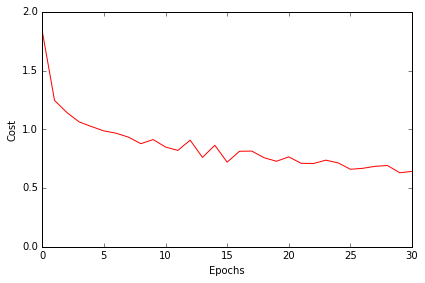

In [10]:
batches = np.array_split(range(len(nn2.cost_)), nn2.epochs+1)
cost_ary = np.array(nn2.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),
         cost_avgs,
         color='red')
plt.ylim([0, 2])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

Continue the training for 200 epochs...

In [11]:
nn2.epochs = 200
nn2 = nn2.fit(X_std, y)

Epoch: 200/200, Elapsed: 0:00:04, ETA: 0:00:00

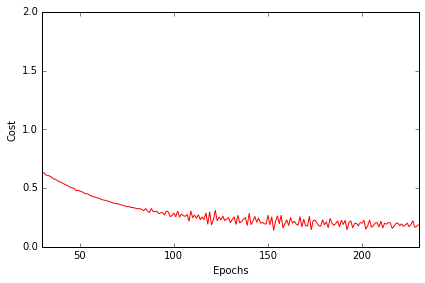

In [12]:
batches = np.array_split(range(len(nn2.cost_)), nn2.epochs+1)
cost_ary = np.array(nn2.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(30, len(cost_avgs)+30),
         cost_avgs,
         color='red')
plt.ylim([0, 2])
plt.xlim([30, 30+nn2.epochs])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [13]:
y_pred = nn2.predict(X_std)
acc = np.sum(y == y_pred, axis=0) / X_std.shape[0]
print('Accuracy: %.2f%%' % (acc * 100))

Accuracy: 96.67%


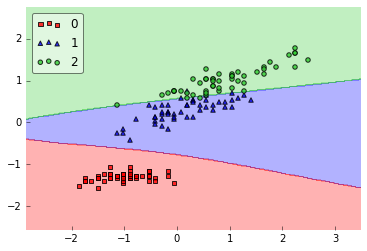

In [14]:
fig = plot_decision_regions(X=X_std, y=y, clf=nn2, legend=2)
plt.show()

## Example 2 - Classifying Handwritten Digits from a 10% MNIST Subset

Load a **5000-sample subset** of the [MNIST dataset](http://rasbt.github.io/mlxtend/docs/data/mnist/) (please see [`data.load_mnist`](../data/load_mnist.md) if you want to download and read in the complete MNIST dataset).


In [15]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = mnist_data()
X, y = shuffle_arrays_unison((X, y), random_state=1)
X_train, y_train = X[:500], y[:500]
X_test, y_test = X[500:], y[500:]

Visualize a sample from the MNIST dataset to check if it was loaded correctly:

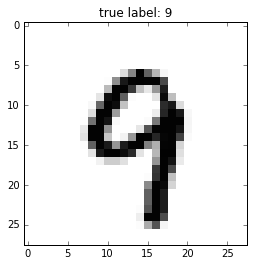

In [16]:
import matplotlib.pyplot as plt

def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
    
plot_digit(X, y, 3500)    

Standardize pixel values:

In [17]:
import numpy as np

std_ary = X.std(axis=0)
std = np.where(std_ary == 0, 1, std_ary)
mean = X.mean(axis=0)

X_train_std = (X_train - mean) / std
X_test_std = (X_test - mean) / std

Initialize the neural network to recognize the 10 different digits (0-10) using 300 epochs and mini-batch learning.

In [23]:
nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train_std.shape[1],
                  n_hidden=75,
                  l2=0.25,
                  l1=0.0,
                  epochs=300,
                  eta=0.005,
                  minibatches=75,
                  alpha=0.1,
                  decrease_const=0.0001,
                  random_state=1,
                  print_progress=3)

Learn the features while printing the progress to get an idea about how long it may take.

In [1]:
import matplotlib.pyplot as plt

nn.fit(X_train_std, y_train)

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 50])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

NameError: name 'nn' is not defined

In [25]:
y_train_pred = nn.predict(X_train_std)
y_test_pred = nn.predict(X_test_std)

train_acc = np.sum(y_train == y_train_pred, axis=0) / X_train_std.shape[0]
test_acc = np.sum(y_test == y_test_pred, axis=0) / X_test_std.shape[0]

print('Train Accuracy: %.2f%%' % (train_acc * 100))
print('Test Accuracy: %.2f%%' % (test_acc * 100))

Train Accuracy: 97.00%
Test Accuracy: 84.38%


# API

In [21]:
from mlxtend.classifier import NeuralNetMLP
help(NeuralNetMLP)

Help on class NeuralNetMLP in module mlxtend.classifier.neuralnet_mlp:

class NeuralNetMLP(builtins.object)
 |  Feedforward neural network / Multi-layer perceptron classifier.
 |  
 |  Parameters
 |  ------------
 |  n_output : int
 |    Number of output units, should be equal to the
 |    number of unique class labels.
 |  
 |  n_features : int
 |    Number of features (dimensions) in the target dataset.
 |    Should be equal to the number of columns in the X array.
 |  
 |  n_hidden : int (default: 30)
 |    Number of hidden units.
 |  
 |  l1 : float (default: 0.0)
 |    Lambda value for L1-regularization.
 |    No regularization if l1=0.0 (default)
 |  
 |  l2 : float (default: 0.0)
 |    Lambda value for L2-regularization.
 |    No regularization if l2=0.0 (default)
 |  
 |  epochs : int (default: 500)
 |    Number of passes over the training set.
 |  
 |  eta : float (default: 0.001)
 |    Learning rate.
 |  
 |  alpha : float (default: 0.0)
 |    Momentum constant. Factor multip